#Quantum error correction using repetion code

#Logical qubit:
#Physical qubit:
#Implementation in physical qubits
#Error correction technique

#Overview of quantum repetion code

#logical qubit -->> encode --> pysical qubits
#logical bit -->> encode --> physical qubits

#Basics of error correction

1. How important is it to you that you are understood correctly
2. How good is your connection

P_a = acceptable probability of being misunderstood

Ice-cream --> P_a --> close to 1

life -----> P_a --> close to 0

P= completely misunderstood/understood

P--> 0 => conncection poor/ completely misunderstood
p--> 1 => connection good/ completely understood

#Case1: connection is good + question and answer is unimportant to you

#P > P_a

#Case2: connection is poor +question and answer is important to you
#P < P_a

Not enough single 'yes or 'no

yes yes yes ---> yes yes no ---> yes

0 0 0 ---> 0 0 1 ---> 0

|0> |0> |0> ---> |0> |0> |1> ---> |0>

#Aspects of error correction

1. Some information that we need to send/store
2. Information is encoded in a larger system -> repeating message
3. Information is decoded -> trusting the majority voting

#Demonstrate using qiskit

#Real device --> multiple types of noise




#Noise model

#Gate error --> an imperfection in any operation we perform
#Measurement error --> probability of bit flip before final measurement

#Installing libraries

In [ ]:
!pip install qiskit
!pip install qiskit.ignis
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 5.3 MB/s 
     |████████████████████████████████| 19.2 MB 2.7 MB/s 
     |████████████████████████████████| 240 kB 28.7 MB/s 
     |████████████████████████████████| 106 kB 13.6 MB/s 
     |████████████████████████████████| 55 kB 1.7 MB/s 
     |████████████████████████████████| 37.5 MB 1.4 MB/s 
     |████████████████████████████████| 943 kB 37.5 MB/s 
     |████████████████████████████████| 50 kB 3.4 MB/s 
     |████████████████████████████████| 49 kB 3.2 MB/s 
     |████████████████████████████████| 4.1 MB 36.2 MB/s 
     |████████████████████████████████| 1.9 MB 38.7 MB/s 
     |████████████████████████████████| 112 kB 43.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.2-py3-none-any.whl size=12226 sha256=db20ae64b37e27ab6fcd53eb8fc05b17df4d7e83ecbf4e3c39e2626959264d77
  Stored in directory: /root/.cache/pip/wheels/30/dc/90/0ee55

In [ ]:
from qiskit import *
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit.visualization import plot_histogram

#Noise model funcion

In [ ]:
from IPython.core.interactiveshell import error
def get_noise(p_gate, p_measure):
  measure_error = pauli_error([('X', p_measure), ('I', 1-p_measure)])
  error_gate1 = depolarizing_error(p_gate, 1) #1 qubit error
  error_gate2 = error_gate1.tensor(error_gate1) #2 qubit error

  noise_model = NoiseModel()

  #apply measurement error to noise model
  noise_model.add_all_qubit_quantum_error(measure_error, 'measure')

  #apply 1 qubit error
  noise_model.add_all_qubit_quantum_error(error_gate1, ["X"])

  #apply 2 qubit error
  noise_model.add_all_qubit_quantum_error(error_gate2, ["CX"])

  return noise_model

#Create noise model

In [ ]:
noise_model = get_noise(0.01, 0.01)

#Encoding with physical qubits

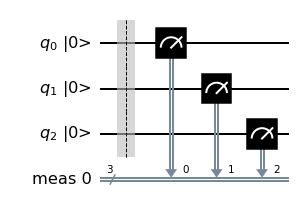

In [ ]:
#Create 3 qubits
circuit = QuantumCircuit(3)
circuit.measure_all()

circuit.draw(initial_state=True, output='mpl')

#Run on simulator

Job Status: job has successfully run


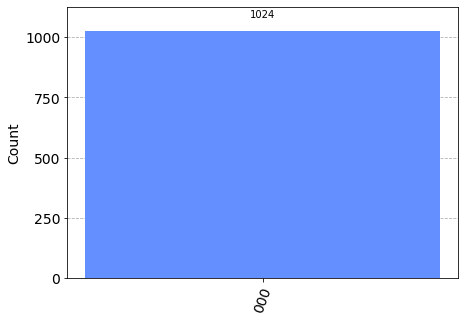

In [ ]:
from qiskit.tools import job_monitor

#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
circuit.save_statevector()

#assemble
qobj = assemble(circuit)

#run
job = simulator.run(circuit)

#job monitor
job_monitor(job)

#get result
result = job.result()

#get counts
counts = result.get_counts()

#plot histogram
plot_histogram(counts)


#Run simulator with noise

Job Status: job has successfully run


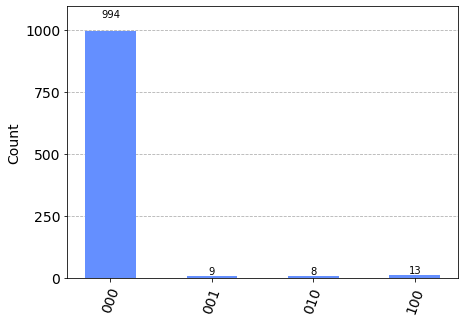

In [ ]:
from qiskit.tools import job_monitor

#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
circuit.save_statevector()

#assemble
qobj = assemble(circuit)

#run
job = simulator.run(qobj, noise_model=noise_model)

#job monitor
job_monitor(job)

#get result
result = job.result()

#get counts
counts = result.get_counts()

#plot histogram
plot_histogram(counts)

#Encode logical 1 using 3 qubits

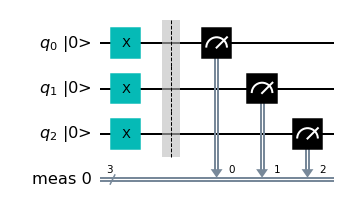

In [ ]:
#Create 3 qubits
circuit = QuantumCircuit(3)

#Apply x gate
circuit.x([0,1,2])

circuit.measure_all()

circuit.draw(initial_state=True, output='mpl')

#Run simulator with noise

Job Status: job has successfully run


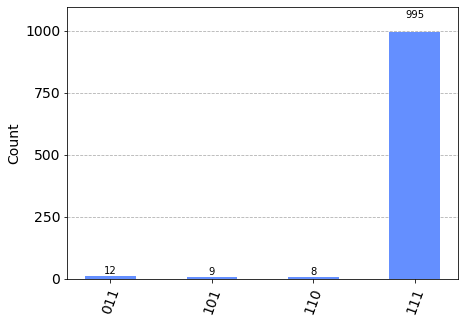

In [ ]:
from qiskit.tools import job_monitor

#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
circuit.save_statevector()

#assemble
qobj = assemble(circuit)

#run
job = simulator.run(qobj, noise_model=noise_model)

#job monitor
job_monitor(job)

#get result
result = job.result()

#get counts
counts = result.get_counts()

#plot histogram
plot_histogram(counts)

#Increased error in noise model

In [ ]:
#50% probability
noise_model = get_noise(0.5,0.5)

#Run on simulator with noise

Job Status: job has successfully run


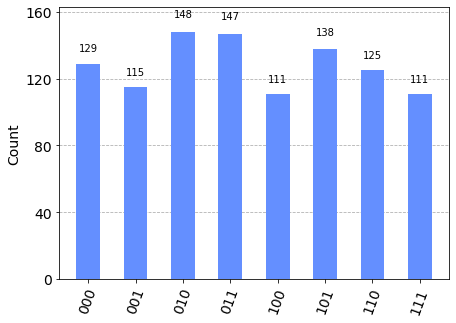

In [ ]:
from qiskit.tools import job_monitor

#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
circuit.save_statevector()

#assemble
qobj = assemble(circuit)

#run
job = simulator.run(qobj, noise_model=noise_model)

#job monitor
job_monitor(job)

#get result
result = job.result()

#get counts
counts = result.get_counts()

#plot histogram
plot_histogram(counts)

#If noise is too strong it can not be corrected

#Other than gate and measurement error

#|000> --> 0
#|111> --> 1
#|+++> --> 000/111 --> human made error/can not be coorected

#Problem: Measurement destroys superposition + without measurement we can not keep track of error

#Syndrome measurement

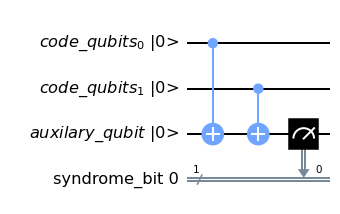

In [ ]:
from qiskit.pulse import cx

#define 2 q register
qr1 = QuantumRegister(2, name='code_qubits')
qr2 = QuantumRegister(1, name='auxilary_qubit')

#1 classical register
cr1 = ClassicalRegister(1, name='syndrome_bit')

#create circuit
qc = QuantumCircuit(qr1, qr2, cr1)

#apply cx gate to both code_qubits
qc.cx(qr1[0], qr2[0])
qc.cx(qr1[1], qr2[0])

#measure auxilary qubit
qc.measure(qr2[0], cr1[0])

#draw circuit
qc.draw(initial_state=True, output='mpl')

#Run on simlator

In [ ]:
from qiskit.tools import job_monitor

#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
#circuit.save_statevector()

#assemble
qobj = assemble(qc)

#run
job = simulator.run(qobj)

#job monitor
job_monitor(job)

#get result
result = job.result()

#get counts
counts = result.get_counts()

#plot histogram
#plot_histogram(counts)

print(counts)


Job Status: job has successfully run
{'0': 1024}


#Encode logical 1 and 2 physical qubits

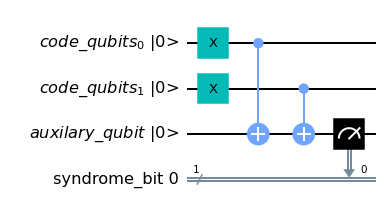

In [ ]:
from qiskit.pulse import cx

#define 2 q register
qr1 = QuantumRegister(2, name='code_qubits')
qr2 = QuantumRegister(1, name='auxilary_qubit')

#1 classical register
cr1 = ClassicalRegister(1, name='syndrome_bit')

#create circuit
qc = QuantumCircuit(qr1, qr2, cr1)

#apply x gate to both code_qubits
qc.x([qr1[0], qr1[1]])

#apply cx gate to both code_qubits
qc.cx(qr1[0], qr2[0])
qc.cx(qr1[1], qr2[0])

#measure auxilary qubit
qc.measure(qr2[0], cr1[0])

#draw circuit
qc.draw(initial_state=True, output='mpl')

#Run on simulator

In [ ]:
from qiskit.tools import job_monitor

#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
#circuit.save_statevector()

#assemble
qobj = assemble(qc)

#run
job = simulator.run(qobj)

#job monitor
job_monitor(job)

#get result
result = job.result()

#get counts
counts = result.get_counts()

#plot histogram
#plot_histogram(counts)

print(counts)

Job Status: job has successfully run
{'0': 1024}


#Prepare code qubits in superposition


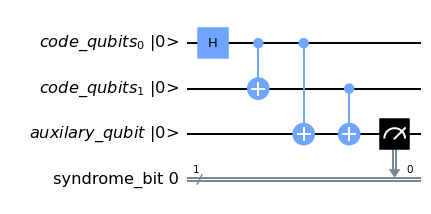

In [ ]:
from qiskit.pulse import cx

#define 2 q register
qr1 = QuantumRegister(2, name='code_qubits')
qr2 = QuantumRegister(1, name='auxilary_qubit')

#1 classical register
cr1 = ClassicalRegister(1, name='syndrome_bit')

#create circuit
qc = QuantumCircuit(qr1, qr2, cr1)

#prepare in superposition
qc.h(qr1[0])
qc.cx(qr1[0], qr1[1])

#apply cx gate to both code_qubits
qc.cx(qr1[0], qr2[0])
qc.cx(qr1[1], qr2[0])

#measure auxilary qubit
qc.measure(qr2[0], cr1[0])

#draw circuit
qc.draw(initial_state=True, output='mpl')

#Run on simulator

In [ ]:
from qiskit.tools import job_monitor

#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
#circuit.save_statevector()

#assemble
qobj = assemble(qc)

#run
job = simulator.run(qobj)

#job monitor
job_monitor(job)

#get result
result = job.result()

#get counts
counts = result.get_counts()

#plot histogram
#plot_histogram(counts)

print(counts)

Job Status: job has successfully run
{'0': 1024}


#Prepare code qubit in different state

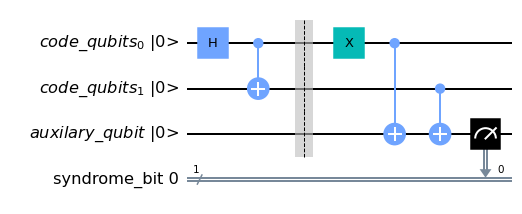

In [ ]:
from qiskit.pulse import cx

#define 2 q register
qr1 = QuantumRegister(2, name='code_qubits')
qr2 = QuantumRegister(1, name='auxilary_qubit')

#1 classical register
cr1 = ClassicalRegister(1, name='syndrome_bit')

#create circuit
qc = QuantumCircuit(qr1, qr2, cr1)

#prepare in superposition
qc.h(qr1[0])
qc.cx(qr1[0], qr1[1])

#barrir
qc.barrier()

#apply x gate
qc.x(qr1[0])

#apply cx gate to both code_qubits
qc.cx(qr1[0], qr2[0])
qc.cx(qr1[1], qr2[0])

#measure auxilary qubit
qc.measure(qr2[0], cr1[0])

#draw circuit
qc.draw(initial_state=True, output='mpl')

#Run on simulator

In [ ]:
from qiskit.tools import job_monitor

#select simulator
simulator = Aer.get_backend('aer_simulator')

#save statevectr
#circuit.save_statevector()

#assemble
qobj = assemble(qc)

#run
job = simulator.run(qobj)

#job monitor
job_monitor(job)

#get result
result = job.result()

#get counts
counts = result.get_counts()

#plot histogram
#plot_histogram(counts)

print(counts)

Job Status: job has successfully run
{'1': 1024}


#Quantum Repetition Code

#Import Libraries

In [ ]:
from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import lookuptable_decoding


#Create repetition code circuit

In [ ]:
#number of physical qubits
n = 3

#round of syndrome measurement
T = 1

code = RepetitionCode(n, T)

#Repetition code returns 2 circuits

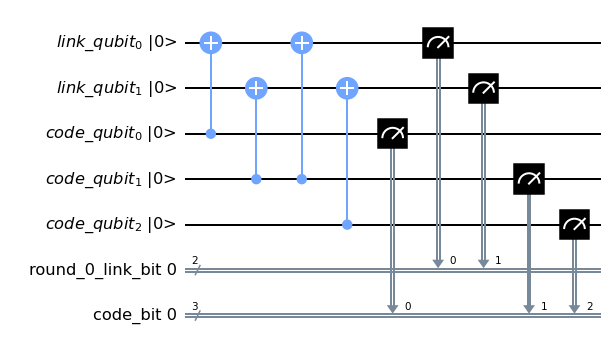

In [ ]:
code.circuit['0'].draw(initial_state=True, output='mpl')

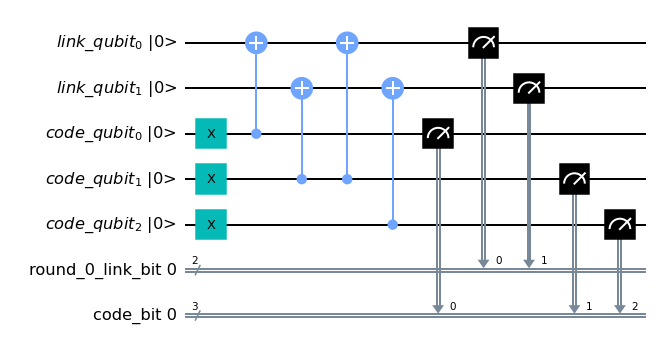

In [ ]:
code.circuit['1'].draw(initial_state=True, output='mpl')

#Run on simulator without noise

In [ ]:
def get_raw_results(code, noise_model=None):
  circuits = code.get_circuit_list()
  raw_results = {}

  for log in range(2):
    qobj = assemble(circuits[log])
    job = simulator.run(qobj, noise_model = noise_model)
    raw_results[str(log)] = job.result().get_counts(str(log))

  return raw_results

raw_results = get_raw_results(code)

for log in raw_results:
  print('Logical', log, ':', raw_results[log], '\n' )

Logical 0 : {'000 00': 1024} 

Logical 1 : {'111 00': 1024} 



#Repetition code for noise

In [ ]:
#number of physical qubits
n = 3

#round of syndrome measurement
T = 1

code = RepetitionCode(n, T)

#Create noise model for repetition code

In [ ]:
noise_model = get_noise(0.05, 0.05)

#Run on simulator with noise

In [ ]:
def get_raw_results(code, noise_model=noise_model):
  circuits = code.get_circuit_list()
  raw_results = {}

  for log in range(2):
    qobj = assemble(circuits[log])
    job = simulator.run(qobj, noise_model = noise_model)
    raw_results[str(log)] = job.result().get_counts(str(log))

  return raw_results

raw_results = get_raw_results(code)

for log in raw_results:
  print('Logical', log, ':', raw_results[log], '\n' )

Logical 0 : {'110 00': 3, '010 01': 1, '100 01': 2, '010 10': 2, '001 10': 3, '001 00': 38, '000 00': 787, '101 00': 1, '000 10': 44, '100 00': 58, '000 01': 39, '011 00': 7, '001 01': 2, '100 10': 2, '010 00': 35} 

Logical 1 : {'101 01': 2, '001 11': 1, '111 11': 5, '010 00': 1, '001 00': 1, '110 01': 1, '011 00': 31, '110 00': 51, '111 01': 48, '101 10': 2, '100 00': 5, '111 00': 781, '101 00': 46, '111 10': 45, '110 10': 2, '011 01': 2} 



#LookUp Table Decoding

In [ ]:
def get_table_results(code, noise_model=noise_model):
  circuits = code.get_circuit_list()
  table_results = {}

  for log in range(2):
    qobj = assemble(circuits[log], shots=10000)
    job = simulator.run(qobj, noise_model = noise_model)
    table_results[str(log)] = job.result().get_counts(str(log))

  return table_results

table_results = get_table_results(code)

for log in table_results:
  print('Logical', log, ':', table_results[log], '\n' )

Logical 0 : {'110 01': 1, '111 00': 1, '011 10': 1, '110 10': 2, '101 00': 15, '001 10': 20, '010 00': 384, '101 10': 2, '100 10': 22, '011 01': 1, '000 01': 372, '100 00': 402, '000 10': 404, '010 11': 3, '000 00': 7817, '001 00': 426, '000 11': 17, '001 11': 3, '011 00': 20, '110 00': 17, '001 01': 18, '010 01': 23, '010 10': 12, '100 01': 17} 

Logical 1 : {'001 10': 3, '011 11': 1, '000 00': 1, '010 01': 2, '110 01': 23, '111 10': 432, '111 00': 7777, '011 10': 20, '101 00': 365, '111 01': 381, '101 10': 22, '111 11': 20, '110 00': 396, '011 00': 437, '001 00': 14, '110 10': 20, '011 01': 27, '010 00': 24, '100 00': 14, '101 01': 21} 



#Call look up table decoding + probability of incorrect decoding

In [ ]:
p = lookuptable_decoding(table_results, raw_results)
print('Probability of incorrect decoding P = ', p)

Probability of incorrect decoding P =  {'0': 0.0048828125, '1': 0.009765625}


In [ ]:
0.0048828125 > 0.009765625

False